# Análisis de sentimiento de textos / Sentiment analysis of texts

In [77]:
# importamos las bibliotecas
# importing the libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, treebank
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imber\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\imber\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Tomamos un texto y calculamos la frecuencia de palabras** 

Taking a text and calculating the frequency of words

In [78]:
text = """In a hole in the ground there lived a hobbit. 
Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, 
nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: 
it was a hobbit-hole, and that means comfort."""

In [79]:
# dividimos el texto en oraciones 
# splitting the text into sentences
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['In a hole in the ground there lived a hobbit.', 'Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, \nnor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: \nit was a hobbit-hole, and that means comfort.']


In [80]:
# dividimos el texto en palabras
# splitting the text into words
tokenized_word = word_tokenize(text)
# elimino los signos de puntuación
# removing punctuation marks
tokenized_word =[word.lower() for word in tokenized_word if word.isalpha()]
print(tokenized_word)

['in', 'a', 'hole', 'in', 'the', 'ground', 'there', 'lived', 'a', 'hobbit', 'not', 'a', 'nasty', 'dirty', 'wet', 'hole', 'filled', 'with', 'the', 'ends', 'of', 'worms', 'and', 'an', 'oozy', 'smell', 'nor', 'yet', 'a', 'dry', 'bare', 'sandy', 'hole', 'with', 'nothing', 'in', 'it', 'to', 'sit', 'down', 'on', 'or', 'to', 'eat', 'it', 'was', 'a', 'and', 'that', 'means', 'comfort']


In [81]:
# miramos la frecuencia 
# looking at the frequencies
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 38 samples and 51 outcomes>


In [82]:
# miramos como se repiten
# let's see how many times they repeat
fdist.most_common()

[('a', 5),
 ('in', 3),
 ('hole', 3),
 ('the', 2),
 ('with', 2),
 ('and', 2),
 ('it', 2),
 ('to', 2),
 ('ground', 1),
 ('there', 1),
 ('lived', 1),
 ('hobbit', 1),
 ('not', 1),
 ('nasty', 1),
 ('dirty', 1),
 ('wet', 1),
 ('filled', 1),
 ('ends', 1),
 ('of', 1),
 ('worms', 1),
 ('an', 1),
 ('oozy', 1),
 ('smell', 1),
 ('nor', 1),
 ('yet', 1),
 ('dry', 1),
 ('bare', 1),
 ('sandy', 1),
 ('nothing', 1),
 ('sit', 1),
 ('down', 1),
 ('on', 1),
 ('or', 1),
 ('eat', 1),
 ('was', 1),
 ('that', 1),
 ('means', 1),
 ('comfort', 1)]

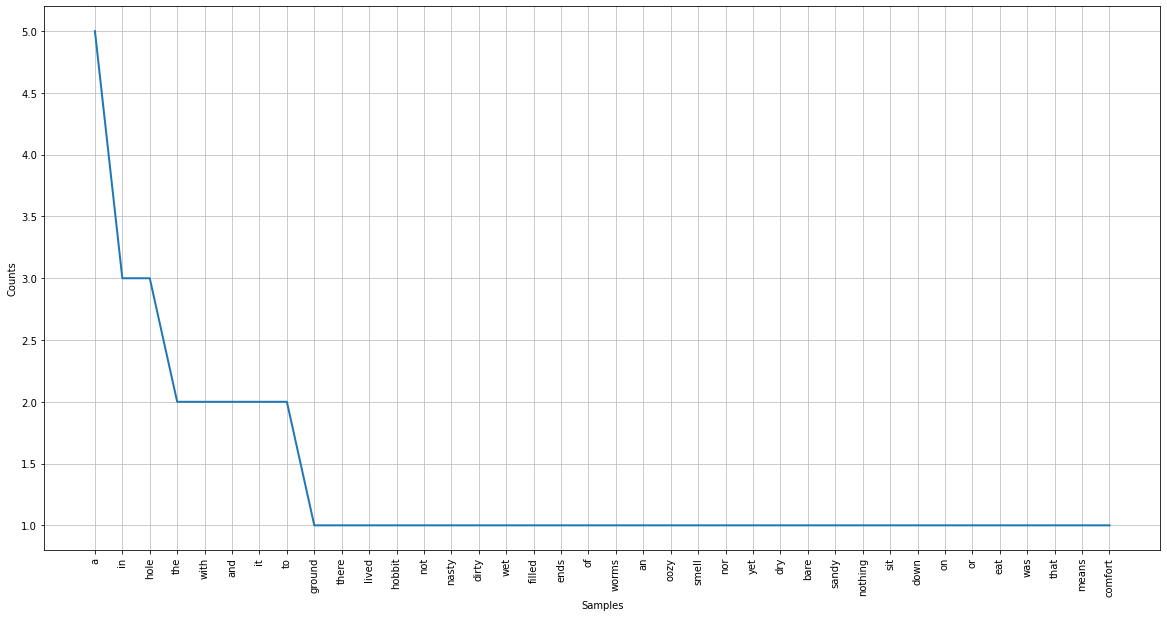

In [83]:
fdist.plot(43, cumulative = False)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

**Exercici 2 Treu les stopwords i realitza stemming al teu conjunt de dades.**

In [84]:
# miramos cuales son las stopwords correspondientes
# looking at the corresponding stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'ve', 'she', 'yours', 'while', 'ourselves', 'own', "wouldn't", 'has', 'are', 'their', "shan't", 'y', 'this', 'where', 'an', "mustn't", 'our', "didn't", 'its', 'from', 'be', 'being', 'both', 'does', 'that', 'most', "hadn't", 'theirs', 'down', 'doesn', 'my', 'herself', 'any', 'here', 'until', "you'll", 'in', 'you', 'ma', 'through', 'having', 'but', 'myself', 'off', "haven't", 'again', 's', 'few', 'did', 'were', 'what', "doesn't", 'him', 'haven', 'so', 'with', 'himself', "you'd", "you've", 'aren', 'such', 'wasn', "wasn't", "don't", "isn't", 'shouldn', 'have', 'against', 'into', 'they', 'can', 'whom', 'won', 'no', 'll', 'd', 'hers', "weren't", 'her', 'yourself', 'before', 'further', 'then', 'shan', "shouldn't", "you're", "mightn't", 't', 'just', 'other', 'ours', 'don', 'had', 'not', 'only', 'couldn', 'mightn', 'same', 'am', 'the', 'each', 'hadn', 'hasn', 'more', 'itself', 'for', 'to', "needn't", 'than', 'as', 'about', 'at', 'on', 'and', 'didn', 'i', 'it', 'is', 'why', 'yourselves', "could

**eliminamos las stopwords**

deliting the stopwords

In [85]:
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filtered Sentence:", filtered_sent)

Tokenized Sentence: ['in', 'a', 'hole', 'in', 'the', 'ground', 'there', 'lived', 'a', 'hobbit', 'not', 'a', 'nasty', 'dirty', 'wet', 'hole', 'filled', 'with', 'the', 'ends', 'of', 'worms', 'and', 'an', 'oozy', 'smell', 'nor', 'yet', 'a', 'dry', 'bare', 'sandy', 'hole', 'with', 'nothing', 'in', 'it', 'to', 'sit', 'down', 'on', 'or', 'to', 'eat', 'it', 'was', 'a', 'and', 'that', 'means', 'comfort']
Filtered Sentence: ['hole', 'ground', 'lived', 'hobbit', 'nasty', 'dirty', 'wet', 'hole', 'filled', 'ends', 'worms', 'oozy', 'smell', 'yet', 'dry', 'bare', 'sandy', 'hole', 'nothing', 'sit', 'eat', 'means', 'comfort']


**normalización lingüística stemming**

linguistic normalization stemming

In [86]:
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:", tokenized_word)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['in', 'a', 'hole', 'in', 'the', 'ground', 'there', 'lived', 'a', 'hobbit', 'not', 'a', 'nasty', 'dirty', 'wet', 'hole', 'filled', 'with', 'the', 'ends', 'of', 'worms', 'and', 'an', 'oozy', 'smell', 'nor', 'yet', 'a', 'dry', 'bare', 'sandy', 'hole', 'with', 'nothing', 'in', 'it', 'to', 'sit', 'down', 'on', 'or', 'to', 'eat', 'it', 'was', 'a', 'and', 'that', 'means', 'comfort']
Stemmed Sentence: ['hole', 'ground', 'live', 'hobbit', 'nasti', 'dirti', 'wet', 'hole', 'fill', 'end', 'worm', 'oozi', 'smell', 'yet', 'dri', 'bare', 'sandi', 'hole', 'noth', 'sit', 'eat', 'mean', 'comfort']


**Realizamos el análisis de sentimientos**

Carrying out sentiment analysis

In [87]:
# convierto el primer texto filtrado en un string y posteriormente lo convierto en un blob
# converting the first filtered text into a string and later I convert it into a blob
text = ' '.join(stemmed_words)
blob = TextBlob(text)
blob

TextBlob("hole ground live hobbit nasti dirti wet hole fill end worm oozi smell yet dri bare sandi hole noth sit eat mean comfort")

In [88]:
polarity = blob.sentiment.polarity # resultado/result entre/between -1 i 1. 
subjectivity = blob.sentiment.subjectivity # resultado/result entre/between 0 i 1.
print(polarity)
print(subjectivity)

-0.05653409090909091
0.421875


**Con el resultado obtenido podemos observar que la polaridad es neutral tendiendo a ser negativo, en muy poca medida, y la subjetividad es un poco más baja de la mitad.**

With the result obtained we can observe that the polarity is neutral tending to be negative, to a very small extent, and the subjectivity is a little lower than half¡

In [89]:
# anàlisi amb mètode Vader 
sid_obj = SentimentIntensityAnalyzer()
print(sid_obj.polarity_scores(blob))

{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612}


**Si hago una análisis con otro método, que es el método Vader, puedo ver que la mayoría de los elementos son neutrales y una pequeña parte son positivos.**

If I do an analysis with another method, which is the Vader method, I can see that most of the elements are neutral and a small part are positive